In [1]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 2.2 MB/s eta 0:00:00


In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [3]:
# Numpy のアップグレード
!pip install numpy --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


ランタイムを再起動してください

In [1]:
# 環境変数を設定
!echo 'export LD_LIBRARY_PATH=/usr/lib' >> ~/.bashrc
!source ~/.bashrc

In [2]:
import pandas_datareader.data as pdr

def get_stock_data(code):
  df = pdr.DataReader("{}.JP".format(code), "stooq").sort_index()
  return df

In [3]:
import talib as ta

df = get_stock_data(5401)   # 日本製鉄
close = df["Close"]

df["ma5"] = ta.SMA(close, timeperiod=5)
df["ma25"] = ta.SMA(close, timeperiod=25)

cross  = df["ma5"] > df["ma25"]
df["cross"] = cross
df

,Open,High,Low,Close,Volume,ma5,ma25,cross
Date,,,,,,,,
2018-05-07,2126.23,2146.22,2113.17,2130.14,4.299801e+06,NaN,NaN,False
2018-05-08,2109.71,2136.66,2109.71,2122.31,2.913794e+06,NaN,NaN,False
2018-05-09,2116.66,2121.00,2101.01,2111.00,2.285937e+06,NaN,NaN,False
2018-05-10,2124.93,2131.88,2115.78,2124.49,1.638642e+06,NaN,NaN,False
2018-05-11,2127.10,2151.01,2122.75,2148.84,2.577674e+06,2127.356,NaN,False
...,...,...,...,...,...,...,...,...
2023-04-25,2985.00,2986.50,2850.50,2856.00,1.989400e+07,2976.600,3002.14,False
2023-04-26,2806.00,2865.00,2786.50,2857.50,1.814180e+07,2942.100,2996.28,False
2023-04-27,2837.50,2896.00,2827.00,2895.50,9.707900e+06,2917.200,2991.34,False


In [4]:
cross_shift = cross.shift(1)
# ゴールデンクロスの発生日
temp_gc = (cross != cross_shift) & (cross == True)
# デッドクロスの発生日
temp_dc  = (cross != cross_shift) & (cross == False)

In [5]:
import numpy as np

# ゴールデンクロス発生日であればMA5の値、それ以外はNaN
gc = [m if g == True else np.nan for g, m in zip(temp_gc, df['ma5'])]

# デッドクロス発生日であればMA25の値、それ以外はNan
dc = [m if d == True else np.nan for d, m in zip(temp_dc, df['ma25'])]

# データフレームのカラムとして保存
df["gc"], df["dc"] = gc, dc

In [6]:
df

,Open,High,Low,Close,Volume,ma5,ma25,cross,gc,dc
Date,,,,,,,,,,
2018-05-07,2126.23,2146.22,2113.17,2130.14,4.299801e+06,NaN,NaN,False,NaN,NaN
2018-05-08,2109.71,2136.66,2109.71,2122.31,2.913794e+06,NaN,NaN,False,NaN,NaN
2018-05-09,2116.66,2121.00,2101.01,2111.00,2.285937e+06,NaN,NaN,False,NaN,NaN
2018-05-10,2124.93,2131.88,2115.78,2124.49,1.638642e+06,NaN,NaN,False,NaN,NaN
2018-05-11,2127.10,2151.01,2122.75,2148.84,2.577674e+06,2127.356,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-04-25,2985.00,2986.50,2850.50,2856.00,1.989400e+07,2976.600,3002.14,False,NaN,NaN
2023-04-26,2806.00,2865.00,2786.50,2857.50,1.814180e+07,2942.100,2996.28,False,NaN,NaN
2023-04-27,2837.50,2896.00,2827.00,2895.50,9.707900e+06,2917.200,2991.34,False,NaN,NaN


<ipython-input-7-70a74c8d8980>:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  handles = axes[0].get_legend().legendHandles


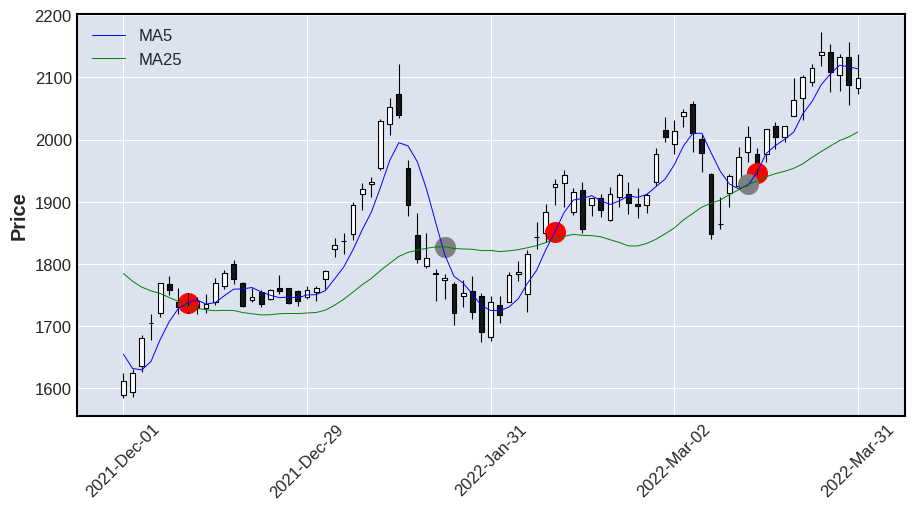

In [7]:
import mplfinance as mpf
import datetime as dt

rdf = df[dt.datetime(2021,12,1):dt.datetime(2022,3,31)]

apd  = {
          # 5日移動平均線
          "MA5": mpf.make_addplot(rdf['ma5'], color="blue", panel=0, width=0.7),
          # 25日移動平均線
          "MA25": mpf.make_addplot(rdf['ma25'], color="green", panel=0, width=0.7),
          "gc": mpf.make_addplot(rdf["gc"], type="scatter", 
                              markersize=200, marker="o", color="red"),
          "dc": mpf.make_addplot(rdf["dc"], type="scatter", 
                               markersize=200, marker="o", color="gray"),
      }

fig, axes = mpf.plot(rdf, type="candle", figratio=(2,1), 
                     addplot=list(apd.values()), returnfig=True)
axes[0].legend([None]*(len(apd)+2))
handles = axes[0].get_legend().legendHandles
axes[0].legend(handles=handles[2:4], labels=list(apd.keys()))
fig.show()